# YAIR AREVALO 
# MODELO K-MEANS
DATOS DE CLIENTES DE UN SUPERMERCADO 

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

ANALISIS EXPLORATORIO DE DATOS 
para identificar
relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
Datos = pd.read_csv("C:/Users/Lenovo/Desktop/unad/ANALISIS DE DATOS/unidad 4/archive/Mall_Customers.csv")

In [4]:
Datos.head(40)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
#decrición de los datos estadistica
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

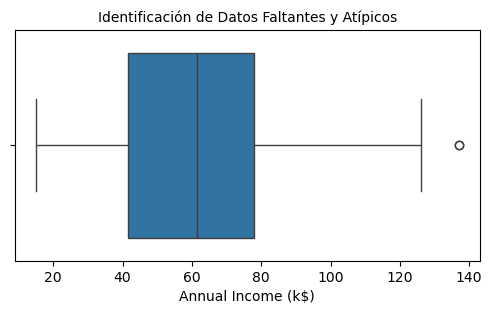

In [9]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

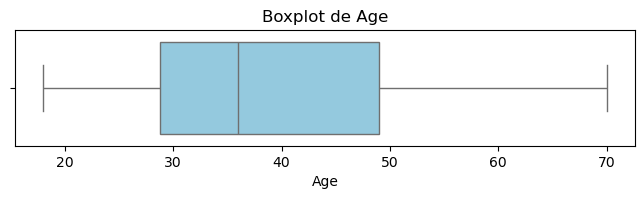

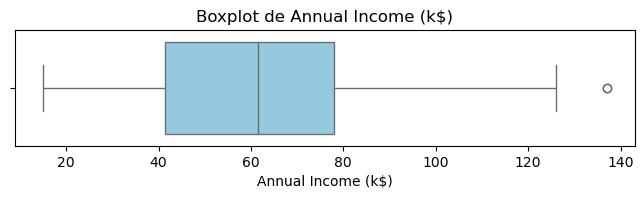

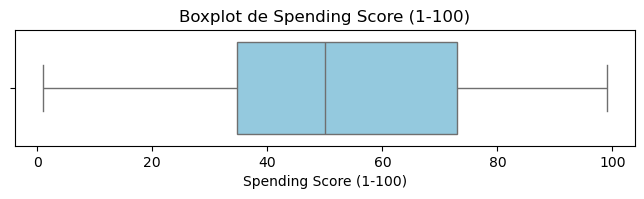

In [15]:
columnas_a_graficar = Datos.columns[2:]

for col in columnas_a_graficar:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(data=Datos, x=col, color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.show()


para Preprocesar los datos limpiándolos, tratando valores faltantes. realizando un analisis medinate el boxplot encontramos en el data set que no hay datos nulos o faltantes ni datos atipicos  en las variables como edad, ingresos anuales, y puntaje de gasto. no te tiene en cuenta las variables como el ID, y el genero ya que son datos que no aportan nuestro analisis 

In [17]:
print(Datos.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [18]:
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en ingreso anual: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en puntaje de gasto: ",Datos['Spending Score (1-100)'].isin([0]).sum())


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en ingreso anual:  0
Cantidad de Registros con cero en puntaje de gasto:  0


# 3 selecionamos las caracteristicas mas relevantes para entrenar el modelo utilizamos seleccion de caracteristicas como mas relevantes como ingreso anual y puntaje de gasto para poder categorizar agrupar a nuestro publico objetivo 

In [74]:
# Filtrar columnas del modelo 

Datos = Datos[["Annual Income (k$)","Spending Score (1-100)"]]


In [75]:
Datos.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


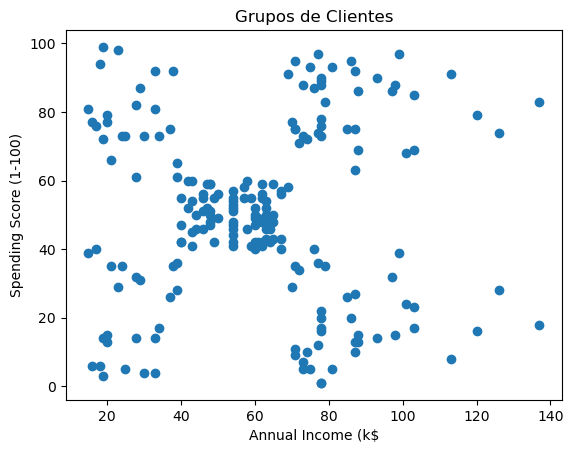

In [76]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$')
plt.ylabel("Spending Score (1-100)")
plt.title('Grupos de Clientes')
plt.show()

# 4 Entrenar el modelo configurando los diferentes hiperparámetros. para encontrar el valor de k se utiliza el metodo de la grafica de codo para determinar la catidad de grupos mas optimo y asi entrenar nuetro modelos 

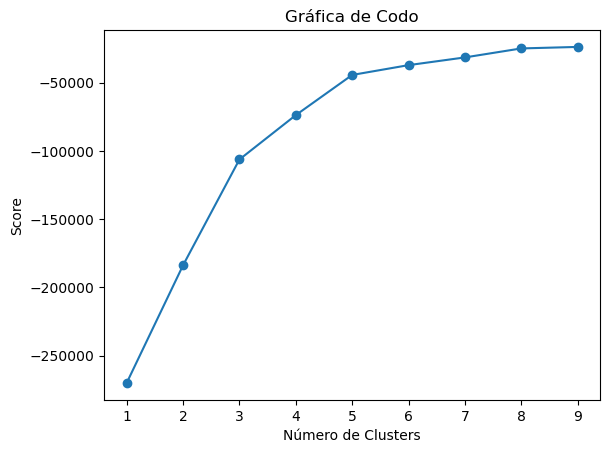

In [77]:

#Se realiza gráfica de codo para identificar valor de K
#usando la grafica de codo 

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

como se puede visualizar en la grafica de codo no indica que el numero de clusters optimo es de 5  ya que apertir de este valor no hay muchos cambios en la grafica, sin embargo vamos a utlizar otro metodo para confirmar y asegurar este valor de k

In [89]:
# grafica de la silueta 
rango_k = range(2, 10)  
sil_scores = []

for k in rango_k:
    modelo = KMeans(n_clusters=k, random_state=0)
    etiquetas = modelo.fit_predict(Datos)
    score = silhouette_score(Datos, etiquetas)
    sil_scores.append(score)
    print(f'k = {k} → Coeficiente de Silhouette: {score:.4f}')


k = 2 → Coeficiente de Silhouette: 0.3840
k = 3 → Coeficiente de Silhouette: 0.3400
k = 4 → Coeficiente de Silhouette: 0.4932
k = 5 → Coeficiente de Silhouette: 0.5544
k = 6 → Coeficiente de Silhouette: 0.4564
k = 7 → Coeficiente de Silhouette: 0.4542
k = 8 → Coeficiente de Silhouette: 0.4554
k = 9 → Coeficiente de Silhouette: 0.4568


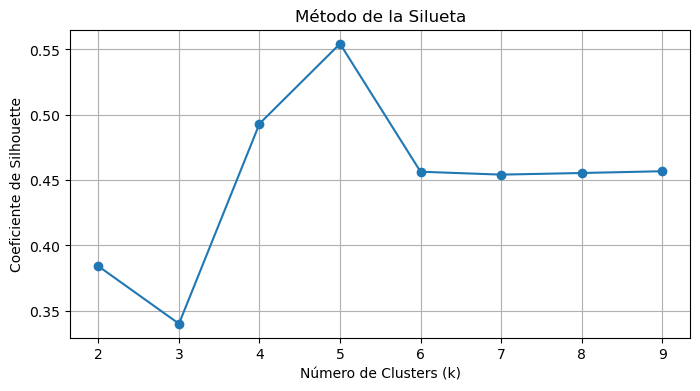

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(rango_k, sil_scores, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Método de la Silueta")
plt.grid(True)
plt.show()


una vez graficamos la silueta seguin la teoria el valor de k es donde se encuentre el valor mas alto en la siluela  y es 5 con esto confirmamos el valor mas optimo de k es 5.

In [91]:
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)
 

KMeans(n_clusters=5, random_state=0)

In [92]:
# vamos agregar la columna Grupo a la base de datos y asi identificar los grupos 

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Annual Income (k$)  Spending Score (1-100)  Grupo
0                    15                      39      2
1                    15                      81      3
2                    16                       6      2
3                    16                      77      3
4                    17                      40      2
..                  ...                     ...    ...
195                 120                      79      1
196                 126                      28      4
197                 126                      74      1
198                 137                      18      4
199                 137                      83      1

[200 rows x 3 columns]


# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [93]:


# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.553931997444648  |
| Indice Calinski Harabasz | 247.35899338037282 |
|  Indice Davies Bouldin   | 0.5725628995597087 |
+--------------------------+--------------------+


-Coeficiente de silhouette: entendemos que el puntaje de silueta es una medida de evaluar la cohesión y la separación de los clústeres entre mas cerca a 1 es mejor en nuestro caso es 0.55 que es Bueno significa que hay una buena separación entre clusters.

-el indice de calinski-harabasz es la que evalua la realcción entre la dispersión dentro de los clusteres y la separacion entre clusteres entre mas lato el valor indica un amejor sepracion estre los grupos  y una menor dispersión dentro los mismo  247 es Alto significa Buena cohesión interna y separación entre clusters (grupos bien formados y separados).

-el indice de Davies-Bouldin al igual que el indice de calinski evalua la relacion entre la dispersión dentro de los clusteres y la separación entre clusteres y entre el valor sea mas bajo indica una mejor separación de los clusteres y una mejor dispersión dentro de los mismos 0.57 es bajo Bajo  Clusters bastante distintos entre sí( los clusters esta bien diferenciados).

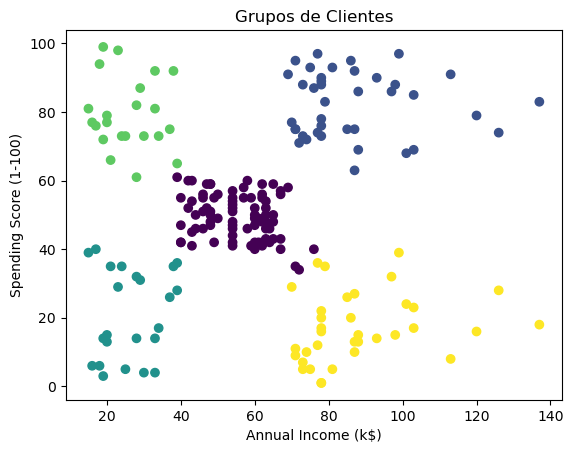

In [103]:
# graficamos y diferenciamos los grupos 
plt.scatter(
    Datos["Annual Income (k$)"],
    Datos["Spending Score (1-100)"],
    c=Datos["Grupo"],
    cmap='viridis'
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Grupos de Clientes")
plt.show()


In [105]:
pip install plotly


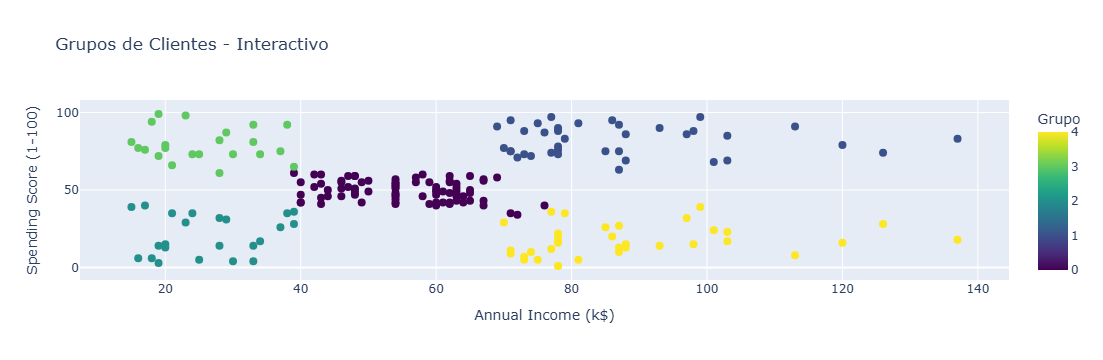

In [107]:
import plotly.express as px

fig = px.scatter(
    Datos,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    color="Grupo",
    hover_data=["Annual Income (k$)", "Spending Score (1-100)", "Grupo"],
    title="Grupos de Clientes - Interactivo",
    color_continuous_scale="viridis"
)

fig.update_traces(marker=dict(size=8))
fig.show()


In [108]:
# Agrupar por "Grupo" y obtener promedio de las variables relevantes
resumen = Datos.groupby("Grupo").mean().round(2)
print(resumen)


       Annual Income (k$)  Spending Score (1-100)
Grupo                                            
0                   55.30                   49.52
1                   86.54                   82.13
2                   26.30                   20.91
3                   25.73                   79.36
4                   88.20                   17.11


In [109]:
print(Datos["Grupo"].value_counts())


Grupo
0    81
1    39
4    35
2    23
3    22
Name: count, dtype: int64


# analisís y resultados 
tenemos 5 grupos numerados del 0 al 4

-grupo 0 es un grupo de clientes con un nivel de ingresos medios y  un puntaje de consumo medio moderado tambien los cuales seria clientes potenciales c para campañas y promociones teniendo en cuenta que representan el 40% de los clientes.

-grupo 1 es el grupo de los clientes ideales ya que cuentan con alto puntaje de consumo y buenos ingresos son clientes a los cueles se le pueden presentar membresias promociones VIP con el fin de fidelización.

-grupo 2 son clientes con bajo ingreso y bajo consumo lo que quiere decir que son clientes que no seria rentables o menos prioritarios para las promociones o campañas.

-grupo 3 son clientes con alto puntaje de consumo pero con ingresos bajos clientes potenciales para promociones de descuentos.

-grupo 4 clientes que ganan mucho pero con un bajo consumo  Potenciales a fidelizar tienen dinero pero gastan poco  se pueden trabajar con marketing personalizado para que empiecen a comparar.
